<a href="https://colab.research.google.com/github/gwegman7630/BIOI-500-Benchmarking-Project-2025/blob/main/Figure_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Figure Generation:

In [1]:
import pandas as pd #for reading in csv as a dataframe
import matplotlib.pyplot as plt #plotting
import seaborn as sns #specific plots (stripplot)

raw = pd.read_csv('/home/BPPrunedData.csv') #read in file
#print(raw)

ex1 = raw[raw['Experiment']==1] #make three separate data frames from raw df based on whether the experiment category had a 1,2, or 3 in it (for the three spearate experiments)
ex2 = raw[raw['Experiment']==2]
ex3 = raw[raw['Experiment']==3]

dvs = ['LGA90', 'misassemblies', 'contigs', '16Sident', 'Runtime(Minutes)', 'MaximumRAM(GB)'] #these are my column headers and i will call this later to grab certain data for graphs
sns.set(font_scale=1.2) #increase fontsize slightly for readability

usage = ['flye', 'unicycler','spades'] #i need this later so i can exclude BRR spades from runtime and memory (since i couldnt benchmark it)

Statistical Analysis:

In [2]:
import scipy.stats as stats #used for anova function
tools = ['flye', 'unicycler', 'spades', 'BRRspades'] #iterate over to streamline pvalue generation


print('Experiment 1') #organization
for i in tools: #for each toolname
  cdf = ex1[ex1['Tool']==i] #pull the data under this specific tool
  for j in dvs: #for each metric under the tool
    anover = stats.f_oneway(cdf[cdf['Scale']=='High'][j], cdf[cdf['Scale']=='Mid'][j], cdf[cdf['Scale']=='Low'][j]) #do anova test by pulling each value from each state within the exp
    print(f'{i}: {j} ',anover) #print the tool name, what metric was checked, and the anova stat + p valye


print('Experiment 2')
for i in tools:
  cdf = ex2[ex2['Tool']==i] #change for exp2
  for j in dvs:
    anover = stats.f_oneway(cdf[cdf['Scale']=='High'][j], cdf[cdf['Scale']=='Mid'][j], cdf[cdf['Scale']=='Low'][j])
    print(f'{i}: {j} ',anover)

print('Experiment 3')
for i in tools:
  cdf = ex3[ex3['Tool']==i]
  for j in dvs:
    anover = stats.f_oneway(cdf[cdf['Scale']=='2018'][j], cdf[cdf['Scale']=='2024'][j]) #change for exp3 since there are only two scales, 2018 and 2024
    print(f'{i}: {j} ',anover)

  #there is a lot of non-significance, due to high variation in such a small amount of replicates

Experiment 1
flye: LGA90  F_onewayResult(statistic=np.float64(0.4166121648136037), pvalue=np.float64(0.6769813671803913))
flye: misassemblies  F_onewayResult(statistic=np.float64(0.5533141210374639), pvalue=np.float64(0.6018149315281214))
flye: contigs  F_onewayResult(statistic=np.float64(0.9722317449434352), pvalue=np.float64(0.4307844623220289))
flye: 16Sident  F_onewayResult(statistic=np.float64(0.6819571865444681), pvalue=np.float64(0.5409131771305794))
flye: Runtime(Minutes)  F_onewayResult(statistic=np.float64(4.961350470673406), pvalue=np.float64(0.05350612948908074))
flye: MaximumRAM(GB)  F_onewayResult(statistic=nan, pvalue=nan)
unicycler: LGA90  F_onewayResult(statistic=np.float64(2.91304347826087), pvalue=np.float64(0.13059620204050476))
unicycler: misassemblies  F_onewayResult(statistic=np.float64(5.818181818181817), pvalue=np.float64(0.039375548526142466))
unicycler: contigs  F_onewayResult(statistic=np.float64(0.6000000000000001), pvalue=np.float64(0.5787037037037035))
un

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Read Quality on LGA90:

<function matplotlib.pyplot.show(close=None, block=None)>

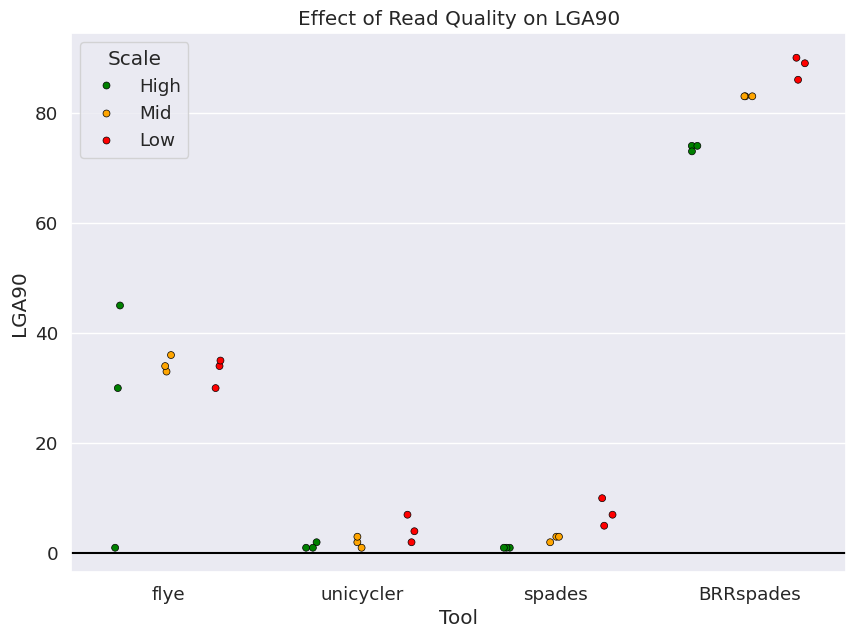

In [3]:
plt.figure(figsize=(10, 7),facecolor='white') #facecolor white did nothing but I keep it here, figsize allows me how large the figure shows up in the output, Im pretty sure its (L,H)
sns.stripplot( #stripplots are very nice because it allows me to plot quantitative data categorically, three values for each Scale's category under one Tool (also a category)
    data = ex1, #my isolated dataframe from raw data variable
    x = "Tool", #specifying x and y based on the dataframe, Tool is a column name in my dataframe
    y = dvs[0], #for ease of use i call the value from the list because I know which column it goes to in the df
    jitter = True, #jitter separates the values slightly along the horizontal axis, so that they are more distinguishable
    hue = 'Scale', #the colors correspond to whether data comes from High, Mid, or Low quality
    palette = ['green', 'orange', 'red'], #specify the colors for the scale IN ORDER
    dodge = True, #this also helps with distinguishing points
    edgecolor ='black', #same thing as above^ gives each point a black outline
    linewidth=0.5 #goes with edgecolor for how big the outline is
)
plt.title('Effect of Read Quality on LGA90') #add a title
plt.axhline(0, color="black") #make a black line along the x axis at value 0, because some of my stuff is close or IS zero so i wanted to make it clearer
plt.show #visualize in output

Read Quality and Misassemblies:

<function matplotlib.pyplot.show(close=None, block=None)>

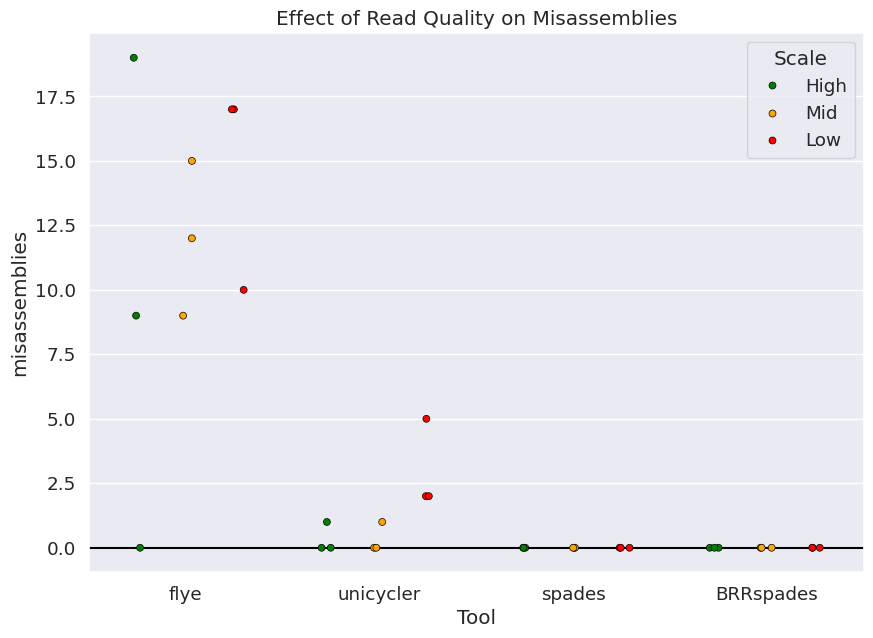

In [4]:
plt.figure(figsize=(10, 7),facecolor='white')
sns.stripplot(
    data = ex1,
    x = "Tool",
    y = dvs[1],
    jitter = True,
    hue = 'Scale',
    palette = ['green', 'orange', 'red'],
    dodge = True,
    edgecolor ='black',
    linewidth=0.5
)
plt.title('Effect of Read Quality on Misassemblies')
plt.axhline(0, color="black")
plt.show

Read Quality and Contig Count:

<function matplotlib.pyplot.show(close=None, block=None)>

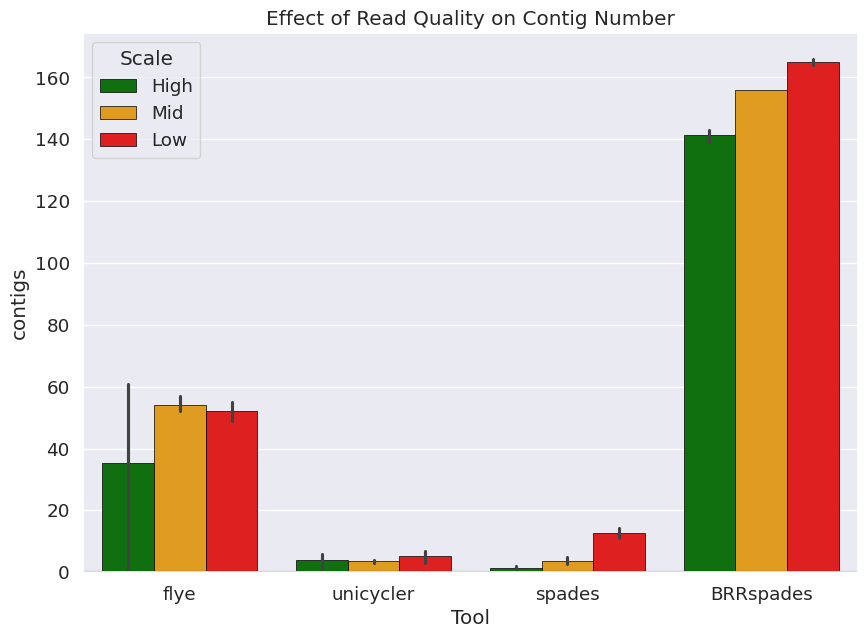

In [5]:
plt.figure(figsize=(10, 7),facecolor='white')
j = sns.barplot(
    data = ex1,
    x = "Tool",
    y = dvs[2],
    hue = 'Scale',
    palette = ['green', 'orange', 'red'],
    edgecolor ='black',
    linewidth=0.5
)
#for container in j.containers: #.containers is the mean value for each one
    #j.bar_label(container, fmt ='%.1f', color ='black', padding = 4) #.bar_label makes the mean value appear for each bar, fmt is how many decimal places, and padding allows me to increase o decease how far they appear above/ in the bar

plt.title('Effect of Read Quality on Contig Number')
plt.axhline(0, color="black")
plt.show

Read Quality and 16S Region Accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

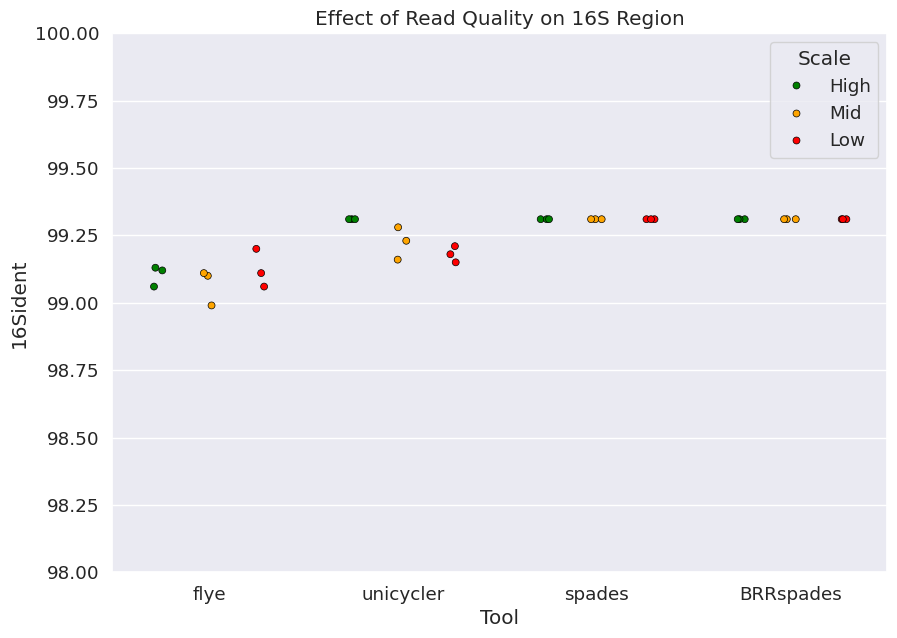

In [6]:
plt.figure(figsize=(10, 7),facecolor='white')
u = sns.stripplot( #set it to a variable so i can mess w stuff on the plot, doesnt affect when i say plt.show
    data = ex1,
    x = "Tool",
    y = dvs[3],
    jitter = True,
    hue = 'Scale',
    palette = ['green', 'orange', 'red'],
    dodge = True,
    edgecolor ='black',
    linewidth=0.5
)
u.set_ylim(98,100) #variable.set_ylim allows me to change the y axis so i can scale it to the data (wasnt doing it automatically)
plt.title('Effect of Read Quality on 16S Region')
plt.axhline(0, color="black")
plt.show

Read Quality and Runtime:

<function matplotlib.pyplot.show(close=None, block=None)>

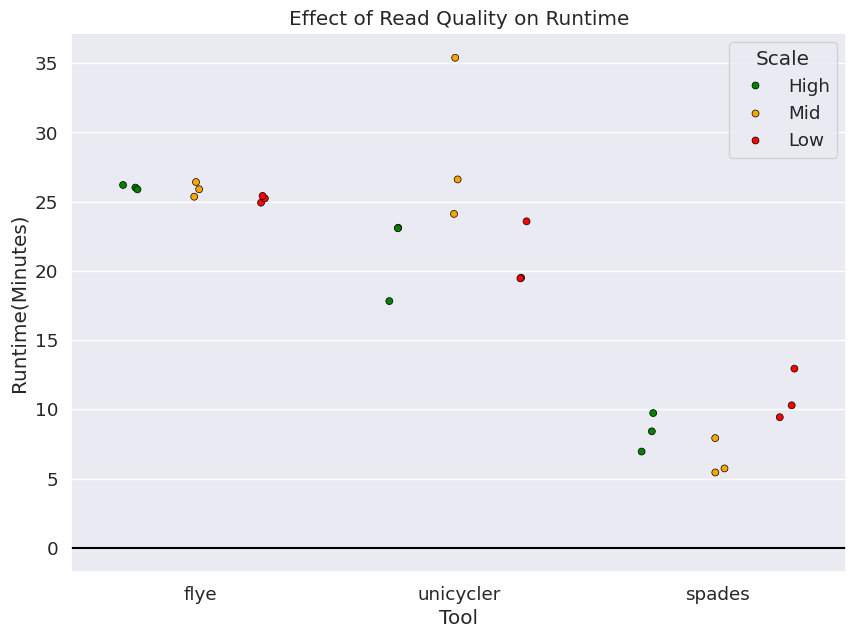

In [7]:
plt.figure(figsize=(10, 7),facecolor='white')
sns.stripplot(
    data = ex1,
    x = "Tool",
    y = dvs[4],
    jitter = True,
    hue = 'Scale',
    palette = ['green', 'orange','red'],
    dodge = True,
    edgecolor ='black',
    linewidth=0.5,
    order = usage #using the order parameter is a clever way to exclude spadesBRR from the data, because whatever data isnt specified in usage doesnt show up
)
plt.title('Effect of Read Quality on Runtime')
plt.axhline(0, color="black")
plt.show

Read Quality and Memory:

<function matplotlib.pyplot.show(close=None, block=None)>

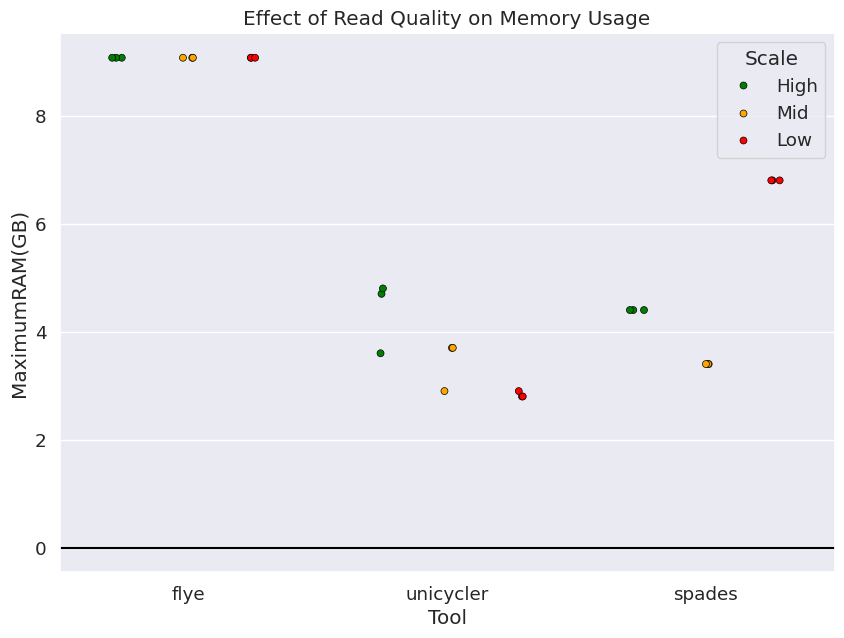

In [8]:
plt.figure(figsize=(10, 7),facecolor='white')
sns.stripplot(
    data = ex1,
    x = "Tool",
    y = dvs[5],
    jitter = True,
    hue = 'Scale',
    palette = ['green', 'orange','red'],
    dodge = True,
    edgecolor ='black',
    linewidth=0.5,
    order = usage
)
plt.title('Effect of Read Quality on Memory Usage')
plt.axhline(0, color="black")
plt.show

Read Coverage and LGA90:

<function matplotlib.pyplot.show(close=None, block=None)>

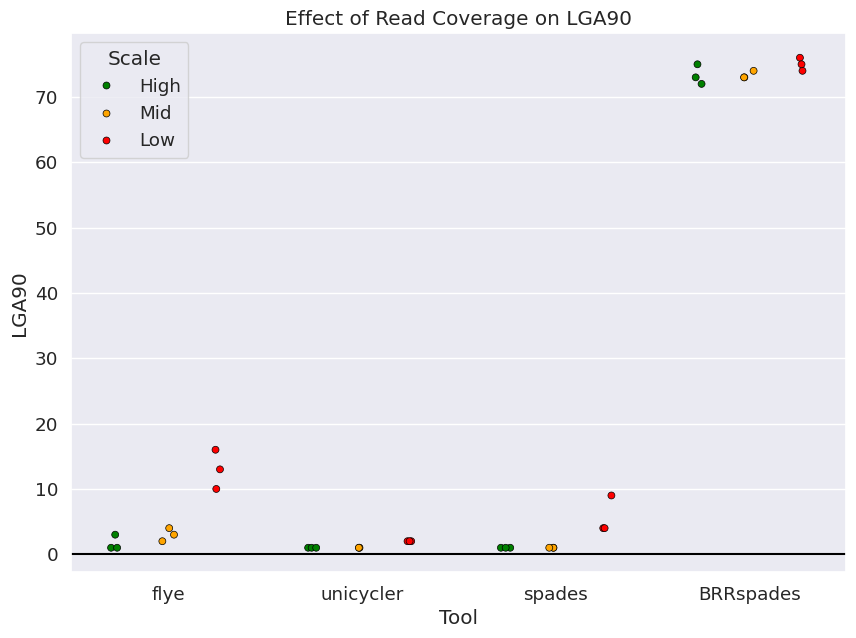

In [9]:
plt.figure(figsize=(10, 7),facecolor='white')
sns.stripplot(
    data = ex2,
    x = "Tool",
    y = dvs[0],
    jitter = True,
    hue = 'Scale',
    palette = ['green', 'orange', 'red'],
    dodge = True,
    edgecolor ='black',
    linewidth=0.5
)
plt.title('Effect of Read Coverage on LGA90')
plt.axhline(0, color="black")
plt.show

Read Coverage and Misassemblies:

<function matplotlib.pyplot.show(close=None, block=None)>

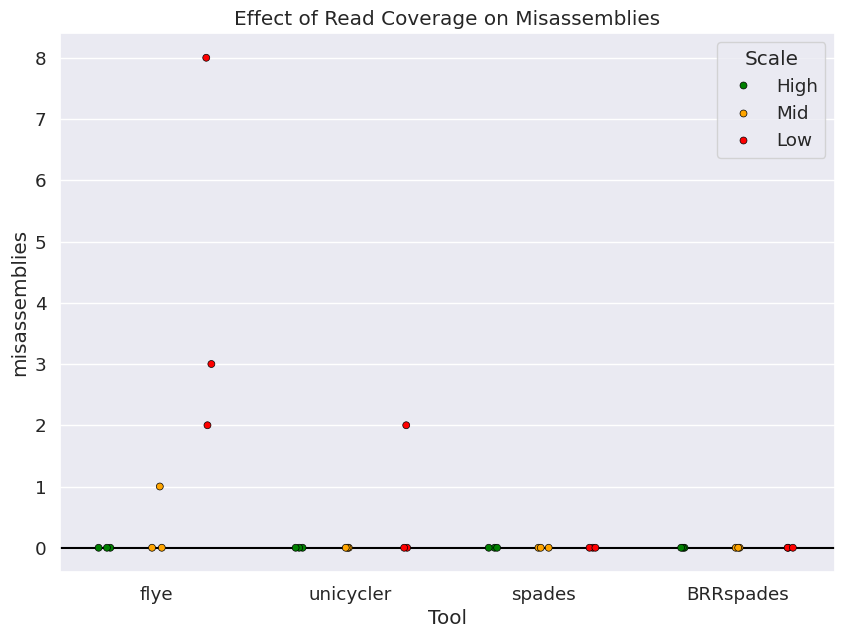

In [10]:
plt.figure(figsize=(10, 7),facecolor='white')
sns.stripplot(
    data = ex2,
    x = "Tool",
    y = dvs[1],
    jitter = True,
    hue = 'Scale',
    palette = ['green', 'orange', 'red'],
    dodge = True,
    edgecolor ='black',
    linewidth=0.5
)
plt.title('Effect of Read Coverage on Misassemblies')
plt.axhline(0, color="black")
plt.show

Read Coverage and Contig Count:

<function matplotlib.pyplot.show(close=None, block=None)>

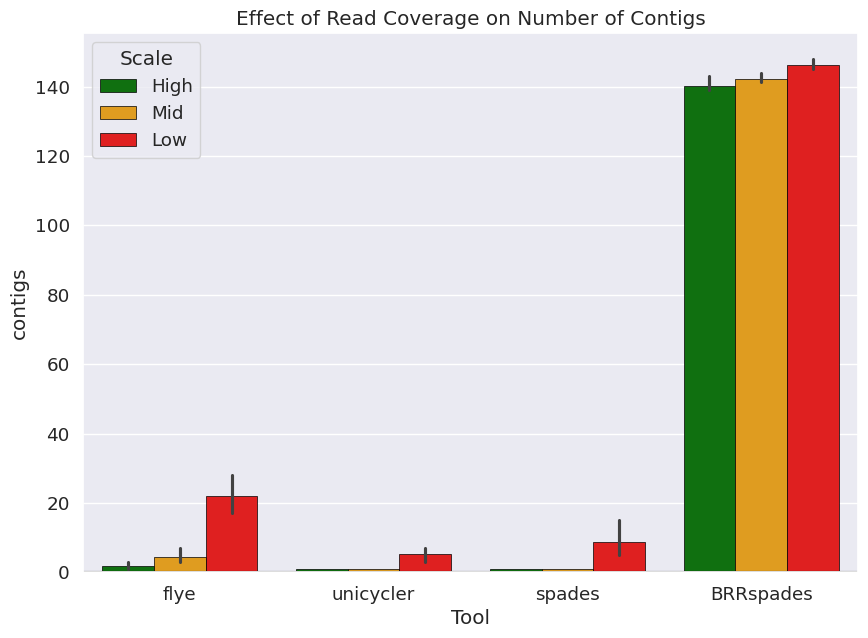

In [11]:
plt.figure(figsize=(10, 7),facecolor='white')
a = sns.barplot(
    data = ex2,
    x = "Tool",
    y = dvs[2],
    hue = 'Scale',
    palette = ['green', 'orange', 'red'],
    dodge = True,
    edgecolor ='black',
    linewidth=0.5
)

plt.title('Effect of Read Coverage on Number of Contigs')
plt.axhline(0, color="black")
plt.show

Read Coverage and 16S Region Accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

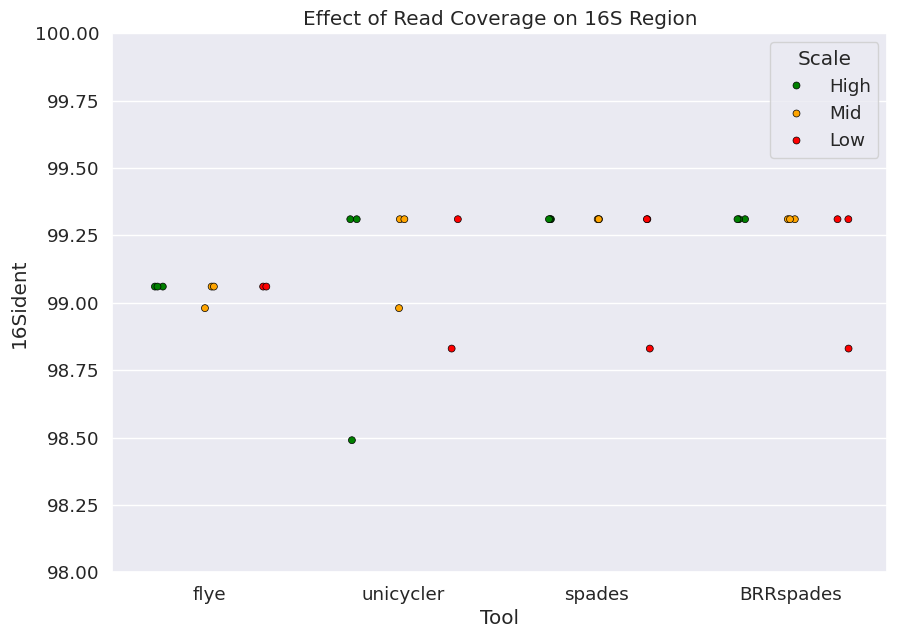

In [12]:
plt.figure(figsize=(10, 7),facecolor='white')
a = sns.stripplot(
    data = ex2,
    x = "Tool",
    y = dvs[3],
    jitter = True,
    hue = 'Scale',
    palette = ['green', 'orange', 'red'],
    dodge = True,
    edgecolor ='black',
    linewidth=0.5,
)
a.set_ylim(98,100)
plt.title('Effect of Read Coverage on 16S Region')
plt.axhline(0, color="black")
plt.show

Read Coverage and Runtime:

<function matplotlib.pyplot.show(close=None, block=None)>

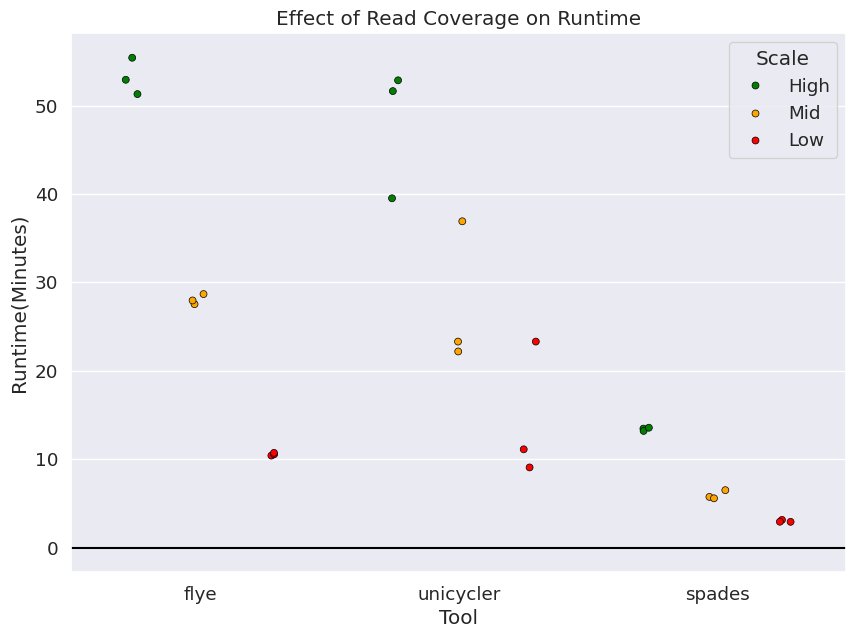

In [13]:
plt.figure(figsize=(10, 7),facecolor='white')
sns.stripplot(
    data = ex2,
    x = "Tool",
    y = dvs[4],
    jitter = True,
    hue = 'Scale',
    palette = ['green', 'orange','red'],
    dodge = True,
    edgecolor ='black',
    linewidth=0.5,
    order = usage
)
plt.title('Effect of Read Coverage on Runtime')
plt.axhline(0, color="black")
plt.show

Read Coverage and Memory:

<function matplotlib.pyplot.show(close=None, block=None)>

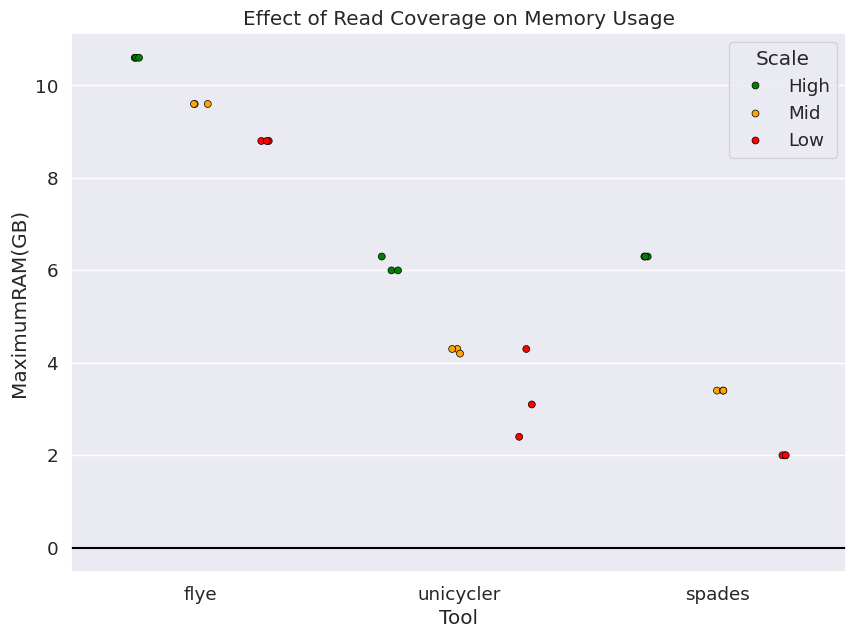

In [14]:
plt.figure(figsize=(10, 7),facecolor='white')
sns.stripplot(
    data = ex2,
    x = "Tool",
    y = dvs[5],
    jitter = True,
    hue = 'Scale',
    palette = ['green', 'orange','red'],
    dodge = True,
    edgecolor ='black',
    linewidth=0.5,
    order = usage
)
plt.title('Effect of Read Coverage on Memory Usage')
plt.axhline(0, color="black")
plt.show

ONT 2018 v 2024 and LGA90:

<function matplotlib.pyplot.show(close=None, block=None)>

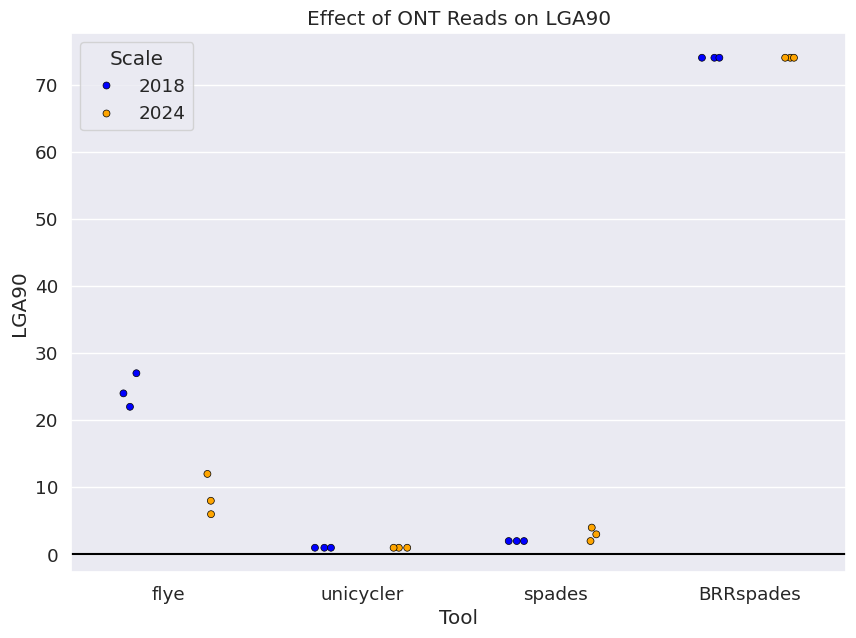

In [15]:
plt.figure(figsize=(10, 7),facecolor='white')
sns.stripplot(
    data = ex3,
    x = "Tool",
    y = dvs[0],
    jitter = True,
    hue = 'Scale',
    palette = ['blue', 'orange'], #here there is only two categories per tool, 2018 and 2024, so i specify w two unrelated colors
    dodge = True,
    edgecolor ='black',
    linewidth=0.5
)
plt.title('Effect of ONT Reads on LGA90')
plt.axhline(0, color="black")
plt.show

ONT 2018 v 2024 and Misassemblies:

<function matplotlib.pyplot.show(close=None, block=None)>

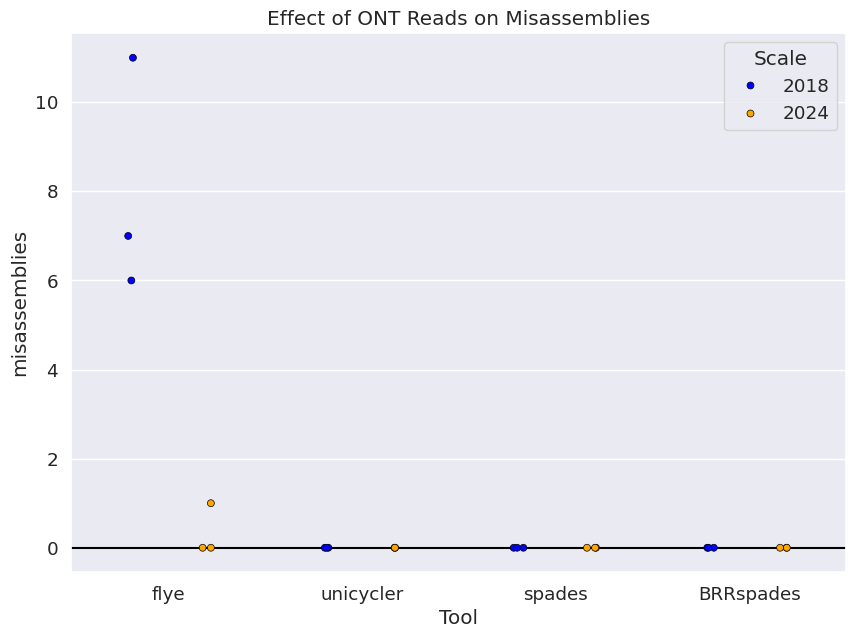

In [16]:
plt.figure(figsize=(10, 7),facecolor='white')
sns.stripplot(
    data = ex3,
    x = "Tool",
    y = dvs[1],
    jitter = True,
    hue = 'Scale',
    palette = ['blue', 'orange'],
    dodge = True,
    edgecolor ='black',
    linewidth=0.5
)
plt.title('Effect of ONT Reads on Misassemblies')
plt.axhline(0, color="black")
plt.show

ONT 2018 v 2024 and Contig Count:

<function matplotlib.pyplot.show(close=None, block=None)>

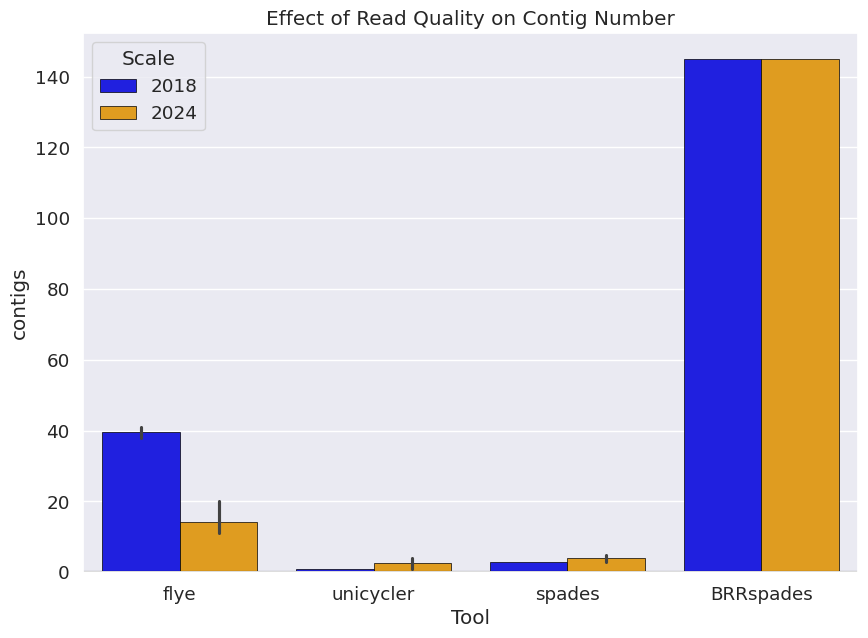

In [17]:

plt.figure(figsize=(10, 7),facecolor='white')
j = sns.barplot(
    data = ex3,
    x = "Tool",
    y = dvs[2],
    hue = 'Scale',
    palette = ['blue', 'orange'],
    edgecolor ='black',
    linewidth=0.5
)
#for container in j.containers: #.containers is the mean value for each one
    #j.bar_label(container, fmt ='%.1f', color ='black', padding = 4) #.bar_label makes the mean value appear for each bar, fmt is how many decimal places, and padding allows me to increase o decease how far they appear above/ in the bar

plt.title('Effect of Read Quality on Contig Number')
plt.axhline(0, color="black")
plt.show

ONT 2018 v 2024 and 16S Region Accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

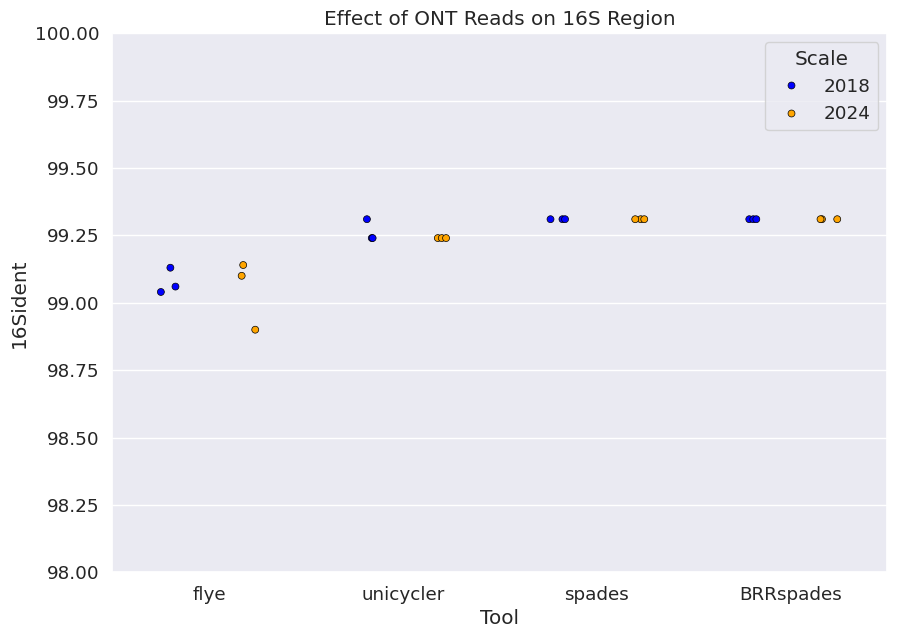

In [18]:
plt.figure(figsize=(10, 7),facecolor='white')
b = sns.stripplot(
    data = ex3,
    x = "Tool",
    y = dvs[3],
    jitter = True,
    hue = 'Scale',
    palette = ['blue', 'orange'],
    dodge = True,
    edgecolor ='black',
    linewidth=0.5
)
b.set_ylim(98,100)
plt.title('Effect of ONT Reads on 16S Region')
plt.axhline(0, color="black")
plt.show

ONT 2018 v 2024 and Runtime:

<function matplotlib.pyplot.show(close=None, block=None)>

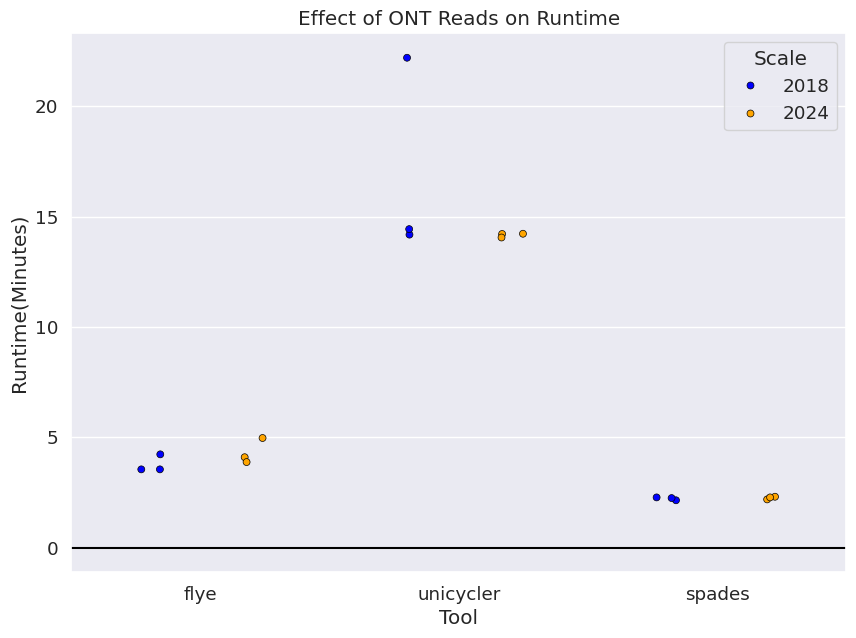

In [19]:
plt.figure(figsize=(10, 7),facecolor='white')
sns.stripplot(
    data = ex3,
    x = "Tool",
    y = dvs[4],
    jitter = True,
    hue = 'Scale',
    palette = ['blue', 'orange'],
    dodge = True,
    edgecolor ='black',
    linewidth=0.5,
    order = usage
)

plt.title('Effect of ONT Reads on Runtime')
plt.axhline(0, color="black")
plt.show

ONT 2018 v 2024 and Memory:

<function matplotlib.pyplot.show(close=None, block=None)>

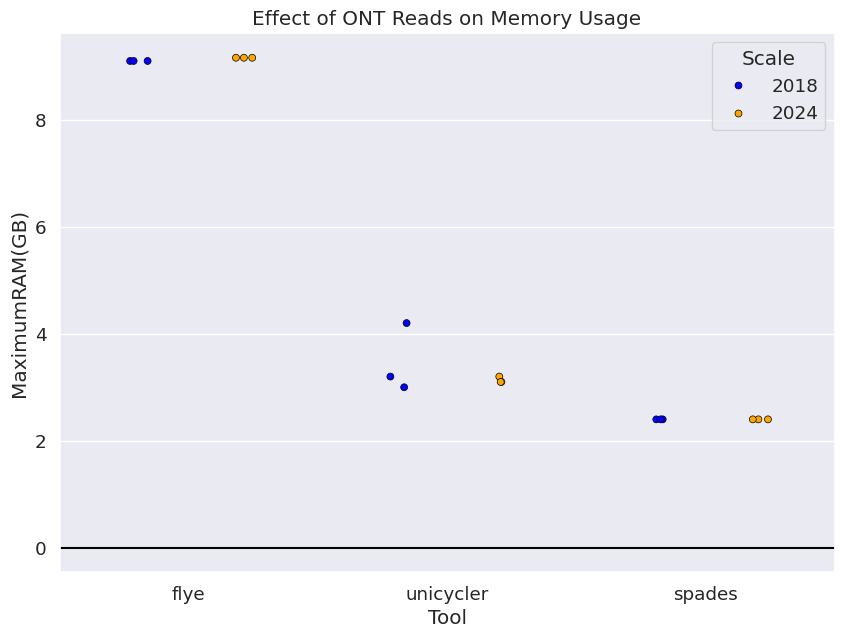

In [20]:
plt.figure(figsize=(10, 7),facecolor='white')
sns.stripplot(
    data = ex3,
    x = "Tool",
    y = dvs[5],
    jitter = True,
    hue = 'Scale',
    palette = ['blue', 'orange'],
    dodge = True,
    edgecolor ='black',
    linewidth=0.5,
    order = usage
)
plt.title('Effect of ONT Reads on Memory Usage')
plt.axhline(0, color="black")
plt.show